In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Analyze Data**

In [ ]:
# Load the mushrooms dataset and define the shape.

df = pd.read_csv('mushrooms.csv')
rows, cols = df.shape
print(f"Total rows (data points): {rows}")
print(f"Total features (excluding target): {cols - 1}")
df

Total rows (data points): 8124
Total features (excluding target): 22


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Check for missing values.
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values in dataset: {total_missing}")

# This isn't completely accurate, as there is a feature in this dataset that labels actual missing values with a "?" instead of a NaN.

Total missing values in dataset: 0


In [ ]:
# Generate a table of features in rows.
summary = []

for col in df.columns:
    dtype = "Categorical" if df[col].dtype == 'object' else "Numerical"
    unique_vals = df[col].unique()

    if dtype == "Categorical":
        values = ", ".join(sorted(unique_vals))
    else:
        values = f"{df[col].min()} to {df[col].max()}"

    summary.append({
        "Feature": col,
        "Type": dtype,
        "Values": values
    })

feature_summary = pd.DataFrame(summary)
print("Feature Summary:")
print(feature_summary.to_string(index=False))

Feature Summary:
                 Feature        Type                             Values
                   class Categorical                               e, p
               cap-shape Categorical                   b, c, f, k, s, x
             cap-surface Categorical                         f, g, s, y
               cap-color Categorical       b, c, e, g, n, p, r, u, w, y
                 bruises Categorical                               f, t
                    odor Categorical          a, c, f, l, m, n, p, s, y
         gill-attachment Categorical                               a, f
            gill-spacing Categorical                               c, w
               gill-size Categorical                               b, n
              gill-color Categorical b, e, g, h, k, n, o, p, r, u, w, y
             stalk-shape Categorical                               e, t
              stalk-root Categorical                      ?, b, c, e, r
stalk-surface-above-ring Categorical           

In [ ]:
# Detect outliers.

print("Rare categories (potential outliers):")
for col in df.columns:
    val_counts = df[col].value_counts()
    rare = val_counts[val_counts < 50]
    if not rare.empty:
        print(f"\n{col} - Rare values:")
        print(rare)

Rare categories (potential outliers):

cap-shape - Rare values:
cap-shape
s    32
c     4
Name: count, dtype: int64

cap-surface - Rare values:
cap-surface
g    4
Name: count, dtype: int64

cap-color - Rare values:
cap-color
c    44
u    16
r    16
Name: count, dtype: int64

odor - Rare values:
odor
m    36
Name: count, dtype: int64

gill-color - Rare values:
gill-color
r    24
Name: count, dtype: int64

stalk-surface-above-ring - Rare values:
stalk-surface-above-ring
y    24
Name: count, dtype: int64

stalk-color-above-ring - Rare values:
stalk-color-above-ring
c    36
y     8
Name: count, dtype: int64

stalk-color-below-ring - Rare values:
stalk-color-below-ring
c    36
y    24
Name: count, dtype: int64

veil-color - Rare values:
veil-color
y    8
Name: count, dtype: int64

ring-number - Rare values:
ring-number
n    36
Name: count, dtype: int64

ring-type - Rare values:
ring-type
f    48
n    36
Name: count, dtype: int64

spore-print-color - Rare values:
spore-print-color
u    48
o 

In [ ]:
# Check for class imbalance.
print("Class distribution (target variable):")
print(df['class'].value_counts())

# Target encoding information.
print("\nTarget variable: 'class'")
print("Type: Classification")
print("Encoded as: 'e' = edible, 'p' = poisonous")

Class distribution (target variable):
class
e    4208
p    3916
Name: count, dtype: int64

Target variable: 'class'
Type: Classification
Encoded as: 'e' = edible, 'p' = poisonous


In [ ]:
feature_value_labels = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# **Data Visualization**

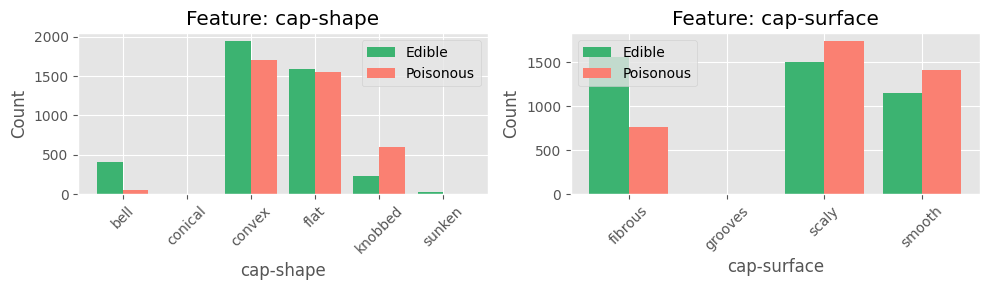

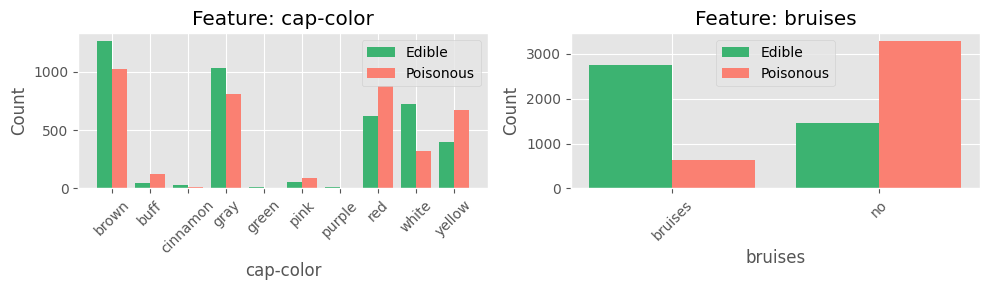

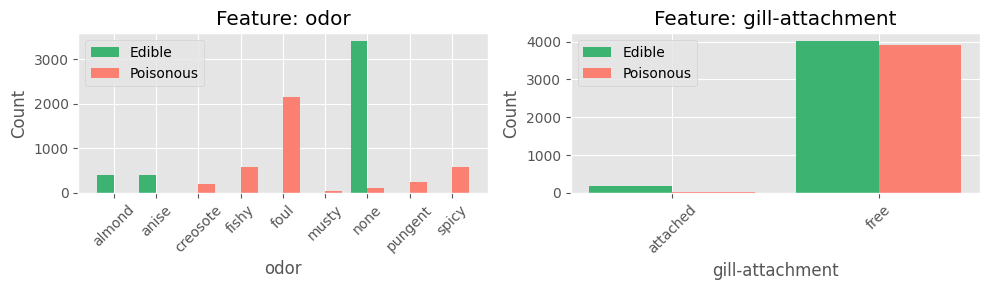

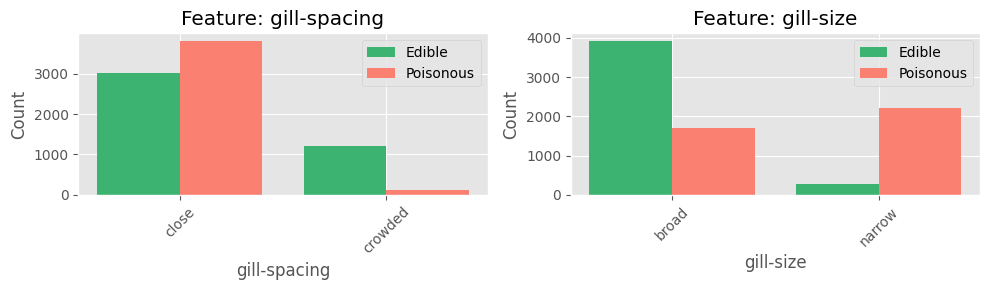

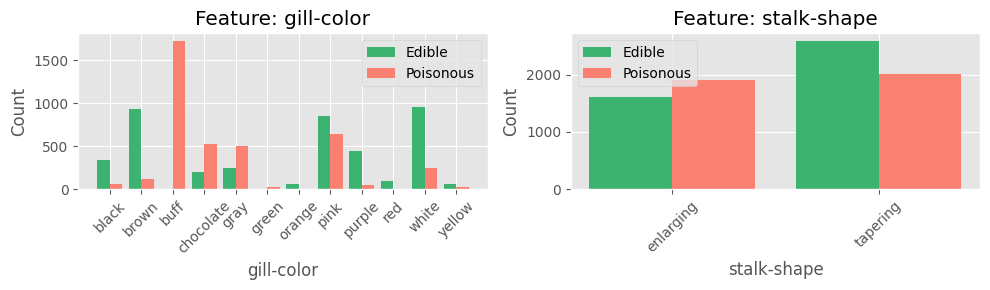

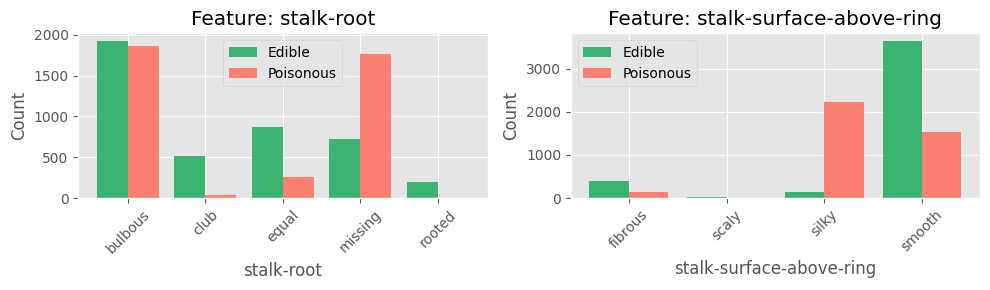

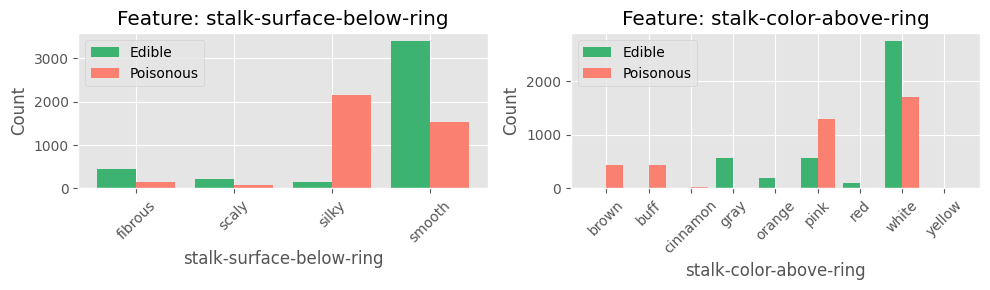

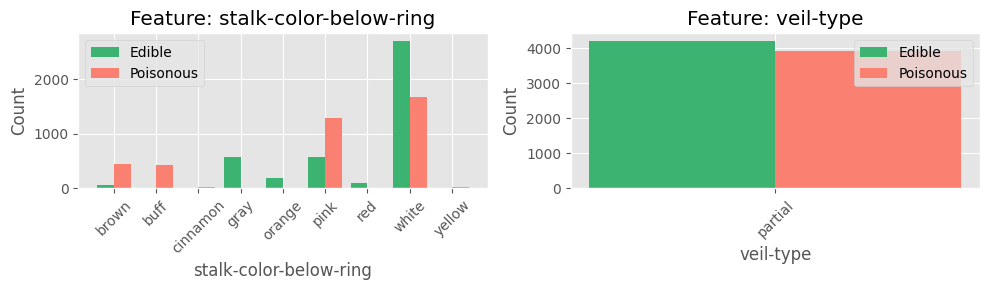

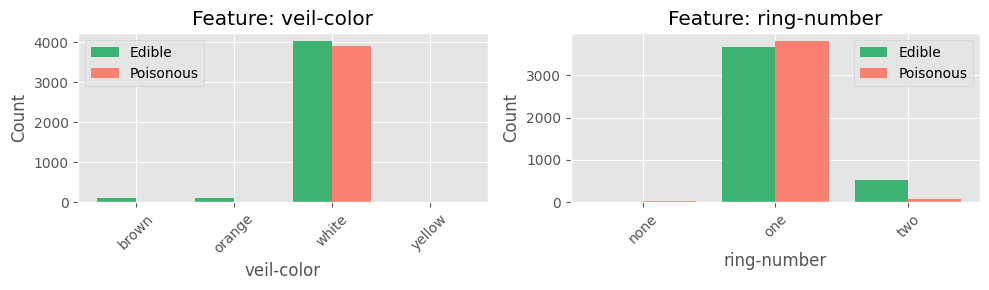

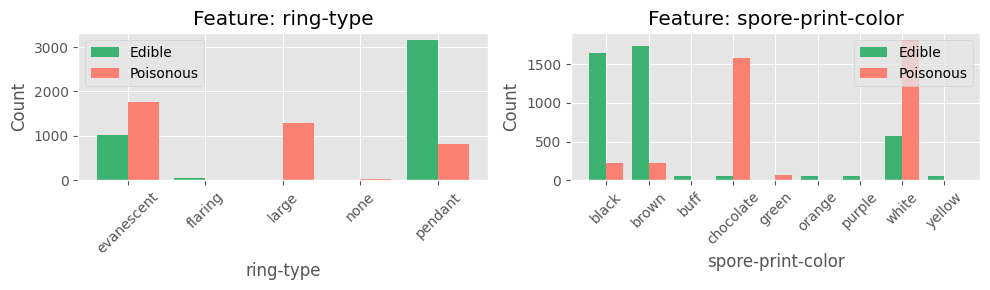

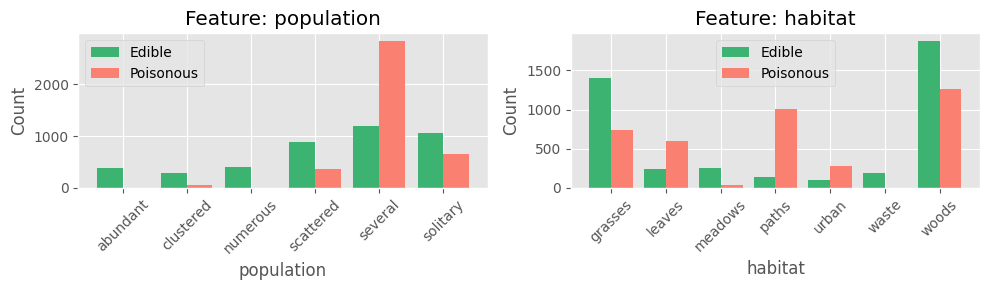

In [ ]:
for feature, mapping in feature_value_labels.items():
    if feature in df.columns:
        df[feature] = df[feature].map(mapping)

# Arrange the plots.
plt.rcParams['figure.figsize'] = (5, 3)
plt.style.use('ggplot')

# Compare each categorical feature across edible and poisonous mushrooms.
features = [col for col in df.columns if col != 'class']

for i in range(0, len(features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    for j in range(2):
        if i + j < len(features):
            feature = features[i + j]
            edible_counts = df[df['class'] == 'e'][feature].value_counts().sort_index()
            poisonous_counts = df[df['class'] == 'p'][feature].value_counts().sort_index()

            categories = sorted(set(edible_counts.index).union(set(poisonous_counts.index)))
            edible = [edible_counts.get(cat, 0) for cat in categories]
            poisonous = [poisonous_counts.get(cat, 0) for cat in categories]

            x = range(len(categories))
            width = 0.4

            ax = axes[j]
            ax.bar([xi - width/2 for xi in x], edible, width=width, label='Edible', color='mediumseagreen')
            ax.bar([xi + width/2 for xi in x], poisonous, width=width, label='Poisonous', color='salmon')

            ax.set_title(f"Feature: {feature}")
            ax.set_xlabel(feature)
            ax.set_ylabel("Count")
            ax.set_xticks(ticks=x)
            ax.set_xticklabels(categories, rotation=45)
            ax.legend()

    plt.tight_layout()
    plt.show()

# **Calculate Importance**

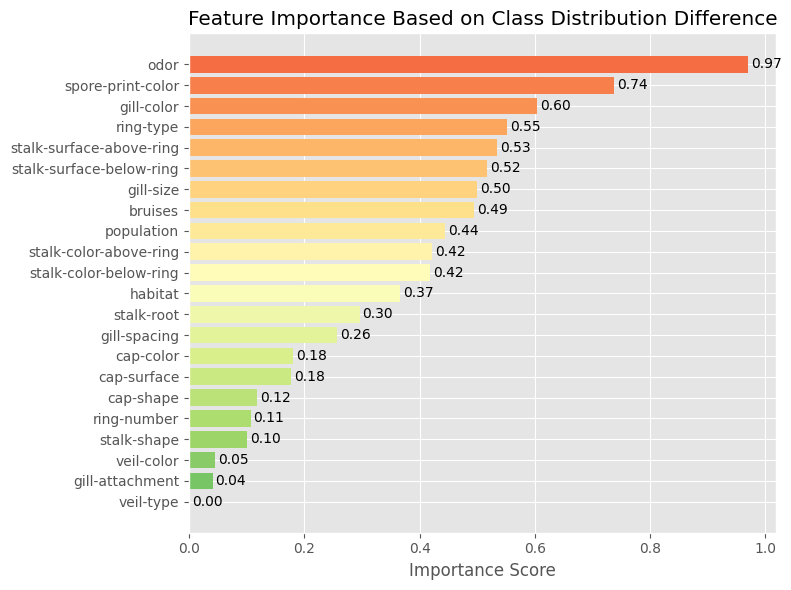

In [ ]:
# Calculate "importance" where features with the biggest differences between Edible and Poisonous having higher scores.
feature_importance = {}
for feature in features:
    counts = df.groupby(['class', feature]).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0)
    diff = proportions.loc['e'] - proportions.loc['p']
    score = np.sum(np.abs(diff)) / 2
    feature_importance[feature] = score

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

labels, scores = zip(*sorted_features)
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, scores, color=plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(labels))))
plt.xlabel('Importance Score')
plt.title('Feature Importance Based on Class Distribution Difference')
plt.gca().invert_yaxis()

for bar, score in zip(bars, scores):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f"{score:.2f}", va='center')

plt.tight_layout()
plt.show()